<div align='center'><font size="5" color='#088a5a'>Pakistan's Rising Data Science Community</font></div>
<div align='center'><font size="4" color="#3a8a08">In-depth comparative analysis of Pakistani Data Science Community and Data Science/ML landscape in Paksitan</font></div>
<hr>
## Data
The Kaggle's third annual Machine Learning and Data Science Survey 2019 received 19,717 respondents from 171 countries and territories. Pakistan is one of the 5 countries where the number of respondents increased from 2018 to 2019. The data provides key insights into what the DS Community around the world is using, what they prefer and what are the demographics of the population. 

## Objective
Understand and provide a comprehensive view of the state of Data Science and Machine Learning in Pakistan. What are the key areas of interest right now and what is needed to increase the outreach of this Community?

## Why Pakistan
* Pakistan's population of 217M people makes it the 5th largest country, slightly ahead of Brazil. It's an incredibly young population; 114M people are under 25, more than the US. 
* Pakistan's Tech Industry is booming, Software Engineers, Data scientists, ML/AI and Mostly the Students are very enthusiastic.
* Pakistani Startups are on a rise: https://www.linkedin.com/pulse/why-pakistani-startups-next-big-thing-aatif-awan/
* Pakistan ranks 6th among the fastest-growing countries of open source projects by the GitHub Report: https://octoverse.github.com/
* I was born and raised in Pakistan and recently got a lot of questions about Data Science/ Data Engineering and ML/AI.

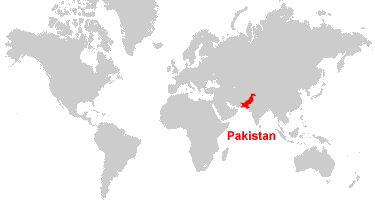
<center>Picture: https://geology.com/</center>
***

## Key Findings
1. Most of the respondents are Male and Students.
2. Bachelors degree is more common than any other education level. 
3. Google Cloud Platform is above Amazon Web Services and Microsoft Azure.
4. Most of the community works in small companies.
5. Python is the preferred programming language of choice.
6. Kaggle and Youtube are the favorite media sources.
7. Majority of DS community is pretty young <1 year and 1-2 years old.
8. Most of the Users do not use ML methods in production, they are in exploration phase.


***

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import seaborn as sns
sns.color_palette("rocket")
sns.set()
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

dir = '../input/kaggle-survey-2019'
kg19 = pd.read_csv(dir+'/multiple_choice_responses.csv')
text19 = pd.read_csv(dir+'/other_text_responses.csv')
questions19 = pd.read_csv(dir+'/questions_only.csv')
schema19 = pd.read_csv(dir+'/survey_schema.csv')

country_list_19 = list(kg19.Q3.unique())[1:]
country = 'Pakistan'
column_mapping = {'Q1':'Age',
'Q2':'Gender',
'Q3':'Country',
'Q4':'Education',
'Q5':'Job Title',
'Q6':'Company Size',
'Q7':'Team Size',
'Q8':'ML Status in Company',
'Q10':'Compensation Status',
'Q11':'$ Spent',
'Q15':'Yrs of Coding',
'Q23':'Yrs ML'                 
}

kg19 = kg19.rename(columns= column_mapping)
kg19= kg19.drop([0], errors='ignore')

# Re-usable Functions
def value_counts(df, column, normalize= True, rename= 'Percentage', return_percent= True):
    if rename is not None and return_percent:
        mod_df= df[column].value_counts(normalize=normalize).rename(rename).mul(100).reset_index()
        mod_df= mod_df.rename(columns ={'index':column})
        return mod_df
def combine_row_country(df_country, df_row):
    df_country['Geography'] = country
    df_row['Geography'] = 'ROW'
    concat = pd.concat([df_country,  df_row], axis = 0).reset_index(drop=True)
    column = list(df_country.columns)[0]
    length_1 = list(df_country[column].unique())
    length_2 = list(df_row[column].unique())
    dict_more=[]
    if(len(length_1) == len(length_2)):
        return concat
    elif(len(length_1) > len(length_2)):
        not_present = []
        for col in length_1:
            if col not in length_2:
                not_present.append(col)
        for col in not_present:
            dict_more.append([col, 0, 'ROW'])
            
    elif(len(length_1) < len(length_2)):
        not_present = []
        for col in length_2:
            if col not in length_1:
                not_present.append(col)
        for col in not_present:
            dict_more.append([col, 0, country])

    new_df = pd.DataFrame(dict_more, columns=[column, 'Percentage', 'Geography'])
    concat = pd.concat([concat,  new_df], axis = 0).reset_index(drop=True)
    return concat

## Overall View of Respondants by Country

In [ ]:
def calculate_percent(series):
    return series.value_counts() / len(series)
percent_per_country = (calculate_percent(kg19['Country'])*100).to_frame().reset_index()\
                                            .rename(columns={'index': 'country name','Country': '%'})

fig = go.Figure(data=go.Choropleth(
    locations=percent_per_country['country name'],
    z = percent_per_country['%'], 
    locationmode='country names', 
    colorscale='ylorrd', colorbar_title='%',
    zmax=5
))

fig.update_layout(title={
        'text': "Kaggle Survey Respondents per Country",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
fig.show()

## Pakistan vs. Rest of the World
* Where does Pakistan sits in terms of repondants compare to the rest of the world?
* Any specific demographics that are different?

In [ ]:
kg19_country = kg19[(kg19['Country'] == country)]
kg19_row = kg19[~(kg19['Country'] == country)]
print("Total Number of Respondents from "+country+": "+str(len(kg19_country)))
print("Total Percentage of "+country+"n Respondents: "+ str(round(len(kg19_country) / len(kg19) *100, 2)) + "%") 
total_respondents = len(kg19) - len(kg19_country)

top_respondents = value_counts(kg19, 'Country')
top_5_respondents = top_respondents.head(5)

your_country = top_respondents[top_respondents['Country']==country]
rank =  int( your_country.index[0] + 1 )
filter_top_5 = top_5_respondents[top_5_respondents['Country'] == country]
if len(filter_top_5) == 0:
    top_5_respondents = pd.concat([ your_country, top_5_respondents])

fig, ax = plt.subplots(figsize=(6,6))
#plt.title('Respondents')
plt.axis('equal')
colors_p = ['darkmagenta','darkorange']
plt.pie(x = [ len(kg19_country), total_respondents], explode= [0.2, 0], labels = [country,'Rest Of World'], startangle=90, shadow=False, colors=colors_p, autopct='%1.1f%%'  );

fig, ax = plt.subplots(figsize=(12,8))
plt.title('Pakistan vs.Top 5 Respondents')
sns.barplot(y = 'Percentage' , x = 'Country', palette='rocket', data = top_5_respondents);

print("Rank in terms of correspondents of "+country+" is "+str(rank) +" out of " + str(len(top_respondents.index)) + " countries")

### 📌 Points to Note:
* Pakistan is at # 19 out of 59 countries, (Note: Country/Territory received less than 50 were grouped into “Other”)
* It is at # 18 for Female respondents (1 point higher than overall respondents)
* Overall the number is low but is very promising as compared to the rest of the world for a developing country

## Age Grouping: Pakistan vs. Rest of the World
* What is typical age group of the population?
* How does the age grouping compare to the Rest of the World?

In [ ]:
age = value_counts(kg19_country, 'Age')
age_row = value_counts(kg19_row, 'Age')
age_concat = combine_row_country(age, age_row)


fig, ax = plt.subplots(figsize=(12,8))
plt.title('Age Group for '+country)
sns.barplot(y = 'Percentage' , x = 'Age', palette='rocket', data = age);


In [ ]:
agec_sort=age_concat.sort_values(by=['Age'],ascending=True)
plt.title('Age Grouping of Pakistan vs. Rest of the World')
sns.set(rc={'figure.figsize':(16,11.27)})
sns.stripplot(x="Age", y="Percentage", hue="Geography",palette='rocket', data=agec_sort);

### 📌 Points to Note
* Mostly the population is young i-e; < 30 years of age
* Ages between 22-24 years is significantly higher than Rest of the world, followed by 18-21 years which matches the understanding of an incredibly young population (114M people are under 25)


## Gender Distribution: Pakistan vs. Rest of the World
* What is gender distribution?
* How does the gender distribution compare to the Rest of the World?

In [ ]:
gender = kg19_country['Gender'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index()
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='index', y ='Percentage',  palette='rocket',data= gender);

**Age and Gender Distribution**

In [ ]:
filter_age_gender = kg19_country.groupby(['Gender','Age']).count().reset_index()[['Gender','Age','Country']]
filter_age_gender =  filter_age_gender.loc[filter_age_gender['Gender'].isin(['Male', 'Female'])]

fig, ax = plt.subplots(figsize=(16,8))
plt.title('Male vs Female Respondents in terms of Age')
sns.barplot(x='Age', y ='Country', hue='Gender', palette='rocket',data= filter_age_gender,  ax=ax);
ax.set_xlabel('Age');
ax.set_ylabel('Count');

## Education: Pakistan vs. Rest of the World
* What is Education level?
* How does the education level compare to the Rest of the World?

In [ ]:
degrees_propotion = value_counts(kg19_country,'Education') 
degrees_propotion_row = value_counts(kg19_row,'Education')

degree_concat = combine_row_country(degrees_propotion, degrees_propotion_row)

fig, ax = plt.subplots(figsize=(8,6))
# title='Degree Holders'
sns.barplot(x='Percentage', y ='Education',  palette='rocket',data= degrees_propotion);

fig, ax = plt.subplots(figsize=(8,6))
# title='Degree Holders" vs ROW'
sns.barplot(x='Percentage', y ='Education',  hue='Geography', palette='rocket',data= degree_concat);

### 📌 Points to Note
* Bachelor's degree is more common than Master's as compared to rest of the world, it could be due to the age group responding to the Survey
* Some college/university without earning a bachelor's degree group is closer to the rest of the world which is very interesting!

### Education and Age Relationship
* Understand if the age group is different for the Education
* Interested in characteristics for some college/university without a degree group

In [ ]:
age_deg_gdr = kg19_country.groupby(['Education','Age']).agg('count').reset_index()[['Education', 'Age', 'Gender']]

fig, ax = plt.subplots(figsize=(16,8))

colors_p = ['darkmagenta','salmon','darkred','lightblue','orangered','green','gold']
age_deg_gdr.pivot('Age','Education','Gender').plot.bar(stacked=True,width=0.8, color=colors_p, ax=ax);
ax.set_xlabel('Age Group');
ax.set_ylabel('Count');
ax.set_title('Education and Age Groups');

### 📌 Points to Note
* No formal degree group are either young (possibly still pursuing the education) or between 40-44 Years of Age

## Money Matters
* What is the Salary distribution?
* Is it different between Male and Female?

In [ ]:
filter_gender_salary = kg19_country.groupby(['Compensation Status', 'Gender']).count().reset_index()[['Compensation Status','Gender','Country']]
filter_gender_salary = filter_gender_salary[filter_gender_salary['Gender'].isin(['Male','Female'])]
total_female = kg19_country.groupby('Gender').count().reset_index()[['Gender', 'Country']].iloc[0,1]
total_male = kg19_country.groupby('Gender').count().reset_index()[['Gender', 'Country']].iloc[1,1]

def normalized_row(row):
  if row['Gender'] == 'Female':
    row['Degree_P'] = (row['Country'] / total_female) * 100
  if row['Gender'] == 'Male':
    row['Degree_P'] = (row['Country'] / total_male) * 100
  return row

filter_gender_salary = filter_gender_salary.apply(normalized_row, axis=1)
agsal_sort=filter_gender_salary.sort_values(by=['Degree_P','Gender'],ascending=False)


fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=75)
sns.barplot(x='Compensation Status', y ='Degree_P',hue='Gender',  palette='rocket',data= agsal_sort,ax=ax);
ax.set_title('Gender and Salary Distribution');
ax.set_xlabel('Gender');
ax.set_ylabel('Percentage');

### 📌 Points to Note
* Common range is 0-999 USD which is inline with comon salaries as 1 USD = ~ 150 PKR
* There are a few female respondants getting 150k-199k USD, I want to know more about them 

## Job Title/Roles: Pakistan vs. Rest of the World
* What are common titles/roles for these people?
* How do they compare to the rest fo the world?

In [ ]:
job_title = value_counts(kg19_country, 'Job Title')
job_title_row = value_counts(kg19_row, 'Job Title')

job_title_concat = combine_row_country(job_title, job_title_row)

fig, ax= plt.subplots(figsize=(12,8))
plt.xticks(rotation=75)
sns.barplot(x='Job Title', y ='Percentage', palette='rocket',data= job_title,ax=ax)



fig, ax= plt.subplots(figsize=(12,8))
plt.xticks(rotation=75)
sns.barplot(x='Job Title', y ='Percentage',hue='Geography', palette='rocket',data= job_title_concat,ax=ax);



### 📌 Points to Note
* Clearly most of them are Students, that is in line with the age group and earlier findings.
* Software Engineers and Data Scientists are almost the same number which is very different as compared to the rest fo the world.
* Very few Statistician, Data Engineers or Analysts roles.

## Where do they work?
* What is a typical company size and how does it compare to rest of the world?

In [ ]:
company_size = value_counts(kg19_country, 'Company Size')
company_size_row = value_counts(kg19_row, 'Company Size')
company_size_concat = combine_row_country(company_size, company_size_row)

fig, ax= plt.subplots(figsize=(8,4))
sns.barplot(x='Percentage', y ='Company Size', palette='rocket',data= company_size,ax=ax);

fig, ax= plt.subplots(figsize=(8,4))
sns.barplot(x='Percentage', y ='Company Size', hue='Geography',palette='rocket',data= company_size_concat,ax=ax);

### 📌 Points to Note
* Majority works in < 50 employee companies and this is significantly different than the rest of the world
* Very less number of people are working with big companies (> 10k employees) which matches with mostly the age group and International companies presence in Pakistan


## Current Use of ML/AI: Pakistan vs. Rest of the World
* What stage of Data Science is the population and how does it comapre to the rest of thr world?

In [ ]:
current_ML = value_counts(kg19_country, column ='ML Status in Company') 
current_ML_row = value_counts(kg19_row, column ='ML Status in Company') 
current_ML_concat = combine_row_country(current_ML, current_ML_row)

dict = {'We are exploring ML methods (and may one day put a model into production)' : 'Exploring ML methods \n(May put a model into production one day)',
        'We recently started using ML methods (i.e., models in production for less than 2 years)': 'Recently started using ML methods \n(models in production < 2 years)',
       'We have well established ML methods (i.e., models in production for more than 2 years)':'Well established ML methods \n(models in production > 2 years)',
       'No (we do not use ML methods)':'No, we do not use ML methods',
       'I do not know':'No idea',
       'We use ML methods for generating insights (but do not put working models into production)':'ML models for Generating insights \n(but do not put working models into production)'}

current_ML_concat['ML Status in Company'] = current_ML_concat['ML Status in Company'].map(dict)


fig, ax= plt.subplots(figsize=(8,8))
# state of ML in Production
sns.barplot(x='Percentage', y ='ML Status in Company', hue='Geography',palette='rocket',data= current_ML_concat,ax=ax);

### 📌 Points to Note
* Most of them exploring mode and recently started to use ML methods
* Rest of the world has a high ratio of already established ML methods and Pakistan has a lot to learn in the process

## $ Spent on ML/AI efforts: Pakistan vs. Rest of the World

In [ ]:
money = value_counts(kg19_country, '$ Spent')
money_row = value_counts(kg19_row, '$ Spent')
money_concat = combine_row_country(money, money_row)

fig, ax= plt.subplots(figsize=(8,8))
plt.xticks(rotation=45)
sns.barplot(x='Percentage', y ='$ Spent', hue='Geography',palette='rocket',data= money_concat,ax=ax);

### 📌 Points to Note
* Very little to no dollars ar ebeing spent rigth now, which is consistent with most of them being students

## Years of Coding and ML: Pakistan vs. Rest of the World
* How many years of experince for coding and ML?
* How does it compare to the rest fo the world?

In [ ]:
yrs_code = value_counts(kg19_country, 'Yrs of Coding')
yrs_code_row = value_counts(kg19_row, 'Yrs of Coding')
yrs_code_concat = combine_row_country(yrs_code, yrs_code_row)

fig, ax= plt.subplots(figsize=(8,4))
sns.barplot(x='Percentage', y ='Yrs of Coding', palette='rocket',data= yrs_code,ax=ax)

fig, ax= plt.subplots(figsize=(8,4))
sns.barplot(x='Percentage', y ='Yrs of Coding', hue='Geography',palette='rocket',data= yrs_code_concat,ax=ax);

**Years of ML**

In [ ]:
yrs_ml = value_counts(kg19_country, column ='Yrs ML')
yrs_ml_row = value_counts(kg19_row, column ='Yrs ML')

yrs_ml_concat = combine_row_country(yrs_ml, yrs_ml_row)
plt.title('Yrs of ML used in Pakistan vs. Rest of the World')
sns.set(rc={'figure.figsize':(11.7,18.27)})
ax = sns.stripplot(x="Yrs ML", y="Percentage", hue="Geography",palette='rocket', data=yrs_ml_concat);




### 📌 Points to Note
* Most of the population is <1 year or coding and ML experience.
* Pakistan is lacking in experienced ML users.

## Media Sources: Pakistan vs. Rest of the World
* What media sources are commly followed and used?
* How does it compares tot he rest fo the world?

In [ ]:
def multiple_answers(limit, df, col, mod_name):
    dict_local = {}

    for i in range(1, limit+1):
        col_name = col + str(i)
        new_col_name = df[col_name].value_counts().reset_index().iloc[0,0]
        dict_local[new_col_name]  = df[col_name].value_counts().reset_index().iloc[0,1]

    new_df = pd.DataFrame(dict_local, index=[0])
    new_df = new_df.melt()
    new_df = new_df.sort_values(by='value', ascending=False)
    new_df = new_df.rename(columns= {'variable':mod_name, 'value':'Count'})
    return new_df

In [ ]:
limit = 12

media = multiple_answers(limit, kg19_country, 'Q12_Part_', 'Media Sources')
media['Percentage']= (media.Count /  media.Count.sum()) * 100
media_row = multiple_answers(limit, kg19_row, 'Q12_Part_', 'Media Sources')
media_row['Percentage']= (media_row.Count /  media_row.Count.sum()) * 100
media_concat = combine_row_country(media, media_row)


fig, ax= plt.subplots(figsize=(8,8))
sns.barplot(x='Percentage', y ='Media Sources', hue='Geography',palette='rocket',data= media_concat,ax=ax);

### 📌 Points to Note
* Kaggle and Youtube are favorite media.
* Podcasts are not common in Pakistan as compared to the rest of the world.

## Favortie Programming Language

In [ ]:
#Take out programming language for india seprately and put in Data Dictonary
programminglang_pk_dict = {
 'Python' : (kg19_country['Q18_Part_1'].count()),
 'R': (kg19_country['Q18_Part_2'].count()),
 'SQL' : (kg19_country['Q18_Part_3'].count()),
 'C' : (kg19_country['Q18_Part_4'].count()),
 'C++' : (kg19_country['Q18_Part_5'].count()),
 'Java ' : (kg19_country['Q18_Part_6'].count()),
 'Javascript' : (kg19_country['Q18_Part_7'].count()),
 'Typescript' : (kg19_country['Q18_Part_8'].count()),
 'Bash ' : (kg19_country['Q18_Part_9'].count()),
 'MATLAB' : (kg19_country['Q18_Part_10'].count())
}
#Convert Data dictonary to series
programminglang_pk_series=pd.Series(programminglang_pk_dict)
fig = px.scatter(programminglang_pk_series, y=programminglang_pk_series.values, x=programminglang_pk_series.index,size=programminglang_pk_series.values)
fig.show();

### 📌 Points to Note
* Python is the winner, which is consistent with the rest of the world

## Cloud Computing Platform

In [ ]:
cc_row_dict = {
 'GCP' : (kg19_row['Q29_Part_1'].count()),
 'AWS': (kg19_row['Q29_Part_2'].count()),
 'Azure' : (kg19_row['Q29_Part_3'].count()),
 'IBM Cloud' : (kg19_row['Q29_Part_4'].count()),
 'AliBaba Cloud' : (kg19_row['Q29_Part_5'].count()),
 'Salesforce Cloud' : (kg19_row['Q29_Part_6'].count()),
 'Oracle Cloud' : (kg19_row['Q29_Part_7'].count()),
 'SAP Cloud' : (kg19_row['Q29_Part_8'].count()),
 'VMware Cloud' : (kg19_row['Q29_Part_9'].count()),
 'Red Hat Cloud' : (kg19_row['Q29_Part_10'].count()),
 'None' : (kg19_row['Q29_Part_11'].count()),
 'Other' : (kg19_row['Q29_Part_12'].count()),
}

cc_pak_dict = {
 'GCP' : (kg19_country['Q29_Part_1'].count()),
 'AWS': (kg19_country['Q29_Part_2'].count()),
 'Azure' : (kg19_country['Q29_Part_3'].count()),
 'IBM Cloud' : (kg19_country['Q29_Part_4'].count()),
 'AliBaba Cloud' : (kg19_country['Q29_Part_5'].count()),
 'Salesforce Cloud' : (kg19_country['Q29_Part_6'].count()),
 'Oracle Cloud' : (kg19_country['Q29_Part_7'].count()),
 'SAP Cloud' : (kg19_country['Q29_Part_8'].count()),
 'VMware Cloud' : (kg19_country['Q29_Part_9'].count()),
 'Red Hat Cloud' : (kg19_country['Q29_Part_10'].count()),
 'None' : (kg19_country['Q29_Part_11'].count()),
 'Other' : (kg19_country['Q29_Part_12'].count()),
}

#Convert Data dictonary to series
cc_row_series=pd.Series(cc_row_dict)
cc_pak_series=pd.Series(cc_pak_dict)

#Visualizing frequently used machine learning algorithm series
fig = go.Figure(data=[
    go.Bar(name='Pakistan',  x=cc_pak_series.index, y=cc_pak_series.values)
])

fig.update_layout(barmode='group')
fig.show();

### 📌 Points to Note
* Google Cloud Platform is more used as compared to Amazon Web Services and Microsoft Azure,this is different than the rest of the world. Google Cloud programs are very active and Pakistan has a huge GDG community!

## Analysis for Text Fields for Entire Dataset to Inspire the Future Data Scientists

In [ ]:
from wordcloud import WordCloud


q9_2019 = text19['Q9_OTHER_TEXT'].dropna()
q14_2019 = text19['Q14_OTHER_TEXT'].dropna()
q141_2019 = text19['Q14_Part_1_TEXT'].dropna()
q12_2019 = text19['Q12_OTHER_TEXT'].dropna()
q29_2019 = text19['Q29_OTHER_TEXT'].dropna()
q34_2019 = text19['Q34_OTHER_TEXT'].dropna()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(q9_2019))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Activities in 2019',fontsize=20);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(q14_2019))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Languages in 2019',fontsize=20);

wordcloud3 = WordCloud( background_color='white',
                       width=600,
                     height=400).generate(" ".join(q141_2019))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Tools in 2019',fontsize=20);

fig, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=[26, 8])
wordcloud4 = WordCloud( background_color='white',
                       width=600,
                     height=400).generate(" ".join(q12_2019))
ax4.imshow(wordcloud4)
ax4.axis('off')
ax4.set_title('Media in 2019',fontsize=20);

wordcloud5 = WordCloud( background_color='white',
                       width=600,
                     height=400).generate(" ".join(q29_2019))
ax5.imshow(wordcloud5)
ax5.axis('off')
ax5.set_title('Additional Cloud in 2019',fontsize=20);

wordcloud6 = WordCloud( background_color='white',
                       width=600,
                     height=400).generate(" ".join(q34_2019))
ax6.imshow(wordcloud6)
ax6.axis('off')
ax6.set_title('DB in 2019',fontsize=20);


## Conclusion and Key Takeaways
* Youth is the Future of Data Science and ML/AI Community of Pakistan.
* Universities have a major role to play in terms of equipping students with the right tools to better prepare for Industry.
* Platforms like Kaggle are supporting the journey for DS Community in Pakistan.
* As companies grow, more opportunities will improve the overall landscape of Data Science and ML/AI in Pakistan.

I cannot wait to see next year's results and participation, I am super optimistic about the Future! 

Feel free to leave comments and any questions.

## References
1. https://en.wikipedia.org/wiki/Pakistan
2. https://www.linkedin.com/pulse/why-pakistani-startups-next-big-thing-aatif-awan/
3. https://octoverse.github.com/